<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/World_War_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## World War 2
제2차 세계 대전의 공중 폭격 작전과 기상 조건의 다양한 데이터를 활용해보겠다.

순서는 다음과 같다.

1. 데이터 설명과 정리
2. 좀 더 이해하기 쉽도록 시각화

위 2가지 EDA과정의 프로세스를 먼저 진행 후 **폭격이 끝나는 시점을 예측**을 적으로 ARIMA 방법을 사용할 것이다.

* 시각화 라이브러리 중 캐글 코드나 구글 코랩을 사용하지 않고 자신의 컴(오프라인)에서 사용하려면 from plotly.offline import init_notebook_mode 를 import plotly.plotly as py 대신 사용하는데, Anaconda에서 별도로 설치해야 한다.  또한 이미 Plotly가 설치 됬다면 자주 업데이트 하는 것이 좋다.
```html
$ pip install plotly 
$ pip install plotly --upgrade
```

* iplot이 kaggle Notebook에서는 보이나 Colab에서는 코드 내 실행되지 않는다.   
이에 대한 대안으로 별도로 html로 저장하여 실행시켜야 한다.
```html
!pip install chart_studio # plotly 패키지 안에 내장되어 있음
!pip install cufflinks # pandas에서 바로 plotly로 개체를 넘겨 그래프를 그린다.
```
```python
import chart_studio
# 그래프 코드 입력
fig.write_html('파일명')
```

In [191]:
!pip install plotly --upgrade
!pip install chart_studio
!pip install cufflinks
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import chart_studio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/WorldWar2"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['operations.csv', 'Summary of Weather.csv', 'Weather Station Locations.csv']


상황을 가정해보자 (상황을 가정하는 것은 질문을 유도하는데 도움을 준다.).

- 곧, 이 데이터는 폭격작전에 포함될 것이다.

### **제2차 세계 대전 항공 폭격 작전 데이터**

- 데이터 해석 : 1945년 A36 항공기와 함께 폰테 올리보 비행장 폭탄을 독일(베를린)에 사용한 미국
- 변수

    Mission Date : 미션 날짜

    Theater of Operations :  현재 군사 작전이 진행 중인 지역; "군대가 출동 대기 중이었다"; 예: "그는 베트남 극장에서 3년 동안 복무했습니다."

    Country: 미국처럼 임무나 작전을 수행하는 국가

    Air Force : 5AF와 같은 공군 통합의 이름 또는 ID

    Aircraft Series : B24와 같은 항공기 모델 또는 유형

    Callsign : 폭탄 공격 전, 메시지, 코드, 발표 또는 라디오로 방송됨

    Takeoff Base : 폰테 올리보 비행장과 같은 이륙 공항 이름

    Takeoff Location : 시칠리아같은 이륙지역

    Takeoff Latitude: 이륙 영역의 위도

    Takeoff Longitude: 이륙 영역의 경도

    Target Country: 독일과 같은 대상 국가

    Target City: 베를린과 같은 목표 도시

    Target Type: 도시 영역과 같은 대상 유형

    Target Industry: 마을 또는 도시와 같은 대상 산업

    Target Priority: 1과 같은 대상 우선 순위(가장 많음)

    Target Latitude: 대상의 위도

    Target Longitude: 대상 경도



      
### **제2차 세계 대전 날씨 데이터**

- WW2동안의 날씨 조건 데이터다. 
ex. 조지타운 기상대에 따르면 1942년 7월 1일의 평균 기온은 23.88도
- 이 데이터 집합에는 2개의 부분 집합이 있다. 
첫 번째 데이터는 국가, 위도, 경도와 같은 기상 관측소 위치
두 번째 데이터는 기상 관측치의 측정된 최소, 최대, 평균 기온
- 기상 관측소 장소 변수

    WBAN: 기상관측소 번호

    NAME: 기상관측소 이름

    STATE/COUNTRY ID: 국가의 약어

    Latitude: 기상관측소 위도

    Longitude: 기상관측소 경도

- 날씨 변수

    STA: 기상관측소 번호(WBAN)

    Date: 온도측정일

    MeanTemp: 평균기온



### 데이터 클리닝

- 공중폭격데이터는 많은 NaN 값을 포함하고 있다. NaN을 이용하는 대신에 일부는 NaN은 drop 하겠다. 이는 불확실성을 제거할 뿐 아니라 쉽게 시각화를 할 수 있기 위함이다. **Drop 프로세스는 다음과 같다.**

    NaN이 포함된 나라들인 경우

    taget longitude 변수가 NaN인 경우

    takeoff longitude 변수가 NaN인 경우

    특성을 사용하지 않은 경우

- 기후 조건 데이터는 클리닝이 필요하지 않다. 데이터 탐색과 시각화를 통해 특정 장소를 선택해 깊게 살펴볼 것이다. 단 이 데이터도 사용할 변수만을 남겨 두겠다.

In [192]:
# bombing data
aerial = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/operations.csv")
aerial_temp = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/Weather Station Locations.csv")
weather_station_location_temp = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/Weather Station Locations.csv")

# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/Summary of Weather.csv")
weather_temp = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/WorldWar2/Summary of Weather.csv")

In [193]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

### aerial[pd.isna(aerial.Country)==False] -> loc 함수 사용 

In [ ]:
aerial_temp.loc[pd.isna(aerial_temp['Target Longitude'])== False]

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,40.000000,500 LB GP (GP-M43/M64),NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,40.000000,1000 LB GP (GP-M44/M65),NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,18.0,NaN,36.0,NaN,NaN,NaN,NaN,36.000000,500 LB GP (GP-M43/M64),NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,15.0,NaN,15.0,NaN,1.0,NaN,NaN,30.000000,500 LB GP (GP-M43/M64),NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,16.000000,1000 LB GP (GP-M44/M65),NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,NAMTOI,SUPPLY AREA,NaN,1,22.833333,96.916667,15.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.000000,250 LB GP (GP-M57),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,MYITSON,UNIDENTIFIED TARGET,NaN,1,21.433333,96.466667,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,8.000000,250 LB GP (GP-M57),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,MYITSON,UNIDENTIFIED TARGET,NaN,1,21.433333,96.466667,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,8.000000,250 LB GP (GP-M57),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEW IRELAND,KAVIENG SWEEP,VARIOUS TARGETS,NaN,NaN,-2.583333,150.833333,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,8.000000,1000 LB GP (GP-M44/M65),8000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


### 데이터 타입 확인

In [194]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

### 날씨 데이터 사용할 변수 선택

In [195]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [196]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


## 데이터 시각화
* 데이터를 이해하기 위해 기본적인 시각화를 해보자
  * 얼마나 많은 나라들이 공격했을까?
  * 최고로 많이 타겟이 된 나라는?
  * 상위 10개의 전투기 시리즈
  * 이륙 장소(공격한 나라)
  * 타겟이 된 장소
  * 폭격 경로
  * 작전지역
  * 기상관측소 위치

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


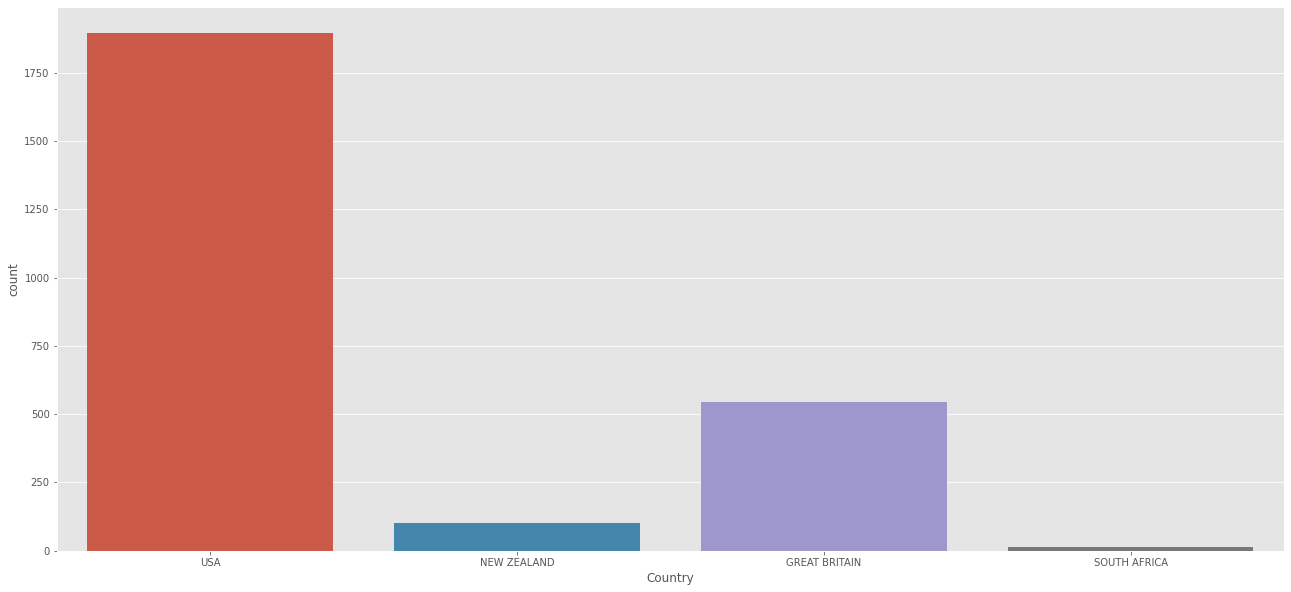

In [197]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


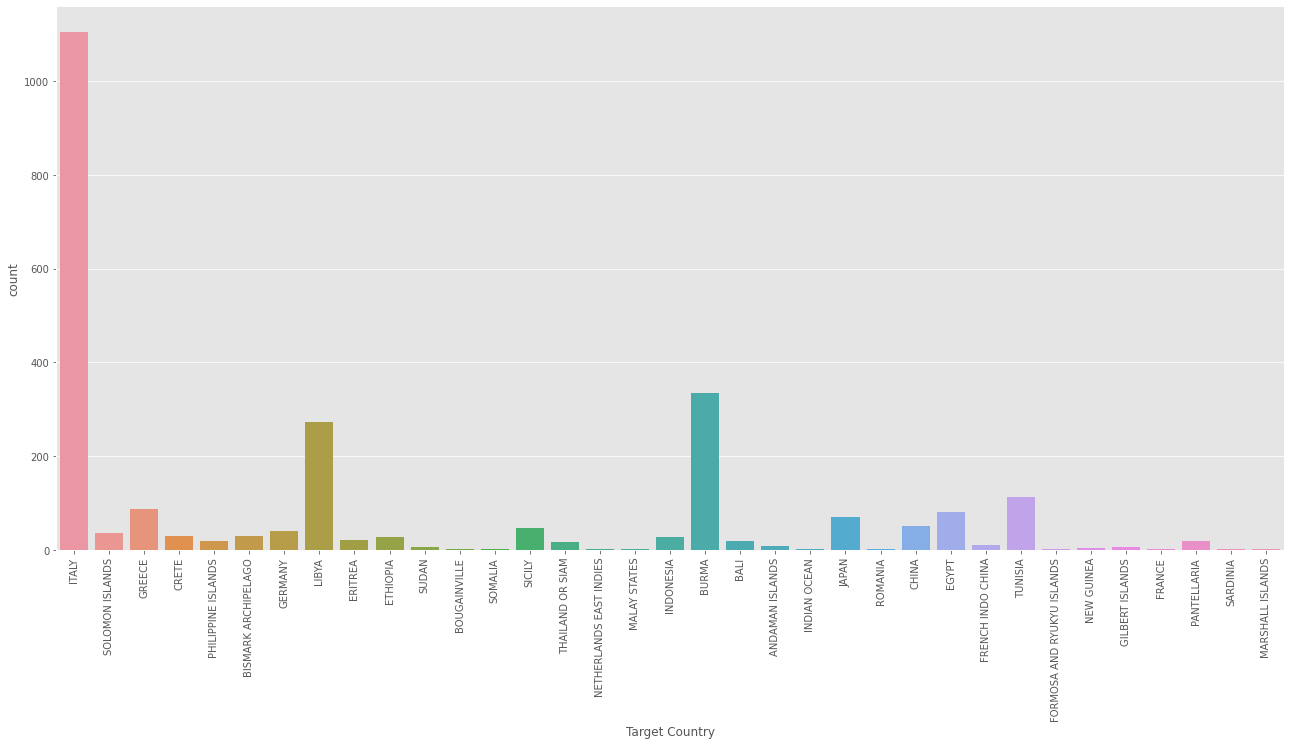

In [198]:
# 최고로 타겟이 된 나라
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [199]:
import chart_studio
#Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data=[go.Bar(
    x=data[:10].index,
    y=data[:10].values,
    hoverinfo='text',
    marker = dict(color='rgba(177,14,22,0.5)',line=dict(color='rgb(0,0,0)',width=1.5))
)]

layout = dict(title='Aircraft Series',)
fig=go.Figure(data=data, layout=layout)
fig.write_html('Aircraft Series')

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


In [200]:
# Attack
aerial["color"]=""

for i,j in zip(["USA","GREAT BRITAIN","NEW ZEALAND","SOUTH AFRICA"], ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]):
   aerial.color[aerial.Country == i] = j

data = [dict(
    type = 'scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+ aerial["Takeoff Location"]+" Takeoff Base: "+aerial["Takeoff Base"],
    mode = 'markers',
    marker = dict(
        sizemode = 'area',
        sizeref = 1, 
        size = 10 ,
        line = dict(width=1, color ='white'),
        color = aerial["color"],
        opacity = 0.7
    ),
)]

layout = dict(
    title="Countries Take Off Bases",
    hovermode='closest',
    geo = dict(showframe =False , showland=True, showcoastlines=True, showcountries= True, 
               countrywidth=1, projection=dict(type="mercator"),
               subunitwidth=1,
               showlakes=True,
               lakecolor='rgb(255,255,255)',
               countrycolor='rgb(5,5,5)')
               
)

fig = go.Figure(data=data, layout=layout)

fig.write_html("Attack country map")

* 폭격 경로를 어떤 나라와 도시에 폭탄이 어떤 나라로 부터 이륙하였는지 시각화 해보겠다.

In [201]:
# Bombing Paths

# trace1
airports = [dict(
            type = 'scattergeo',
            lon = aerial["Takeoff Longitude"],
            lat = aerial["Takeoff Latitude"],
            hoverinfo = 'text',
            text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
            mode = 'markers',
            marker = dict(
                size=5,
                color=aerial["color"],
                line = dict(
                    width=1,
                    color = "white"
                           )
                          )
                  )
            ]

# trace2
targets = [dict(
    type = "scattergeo",
    lon = aerial["Target Longitude"],
    lat = aerial["Target Latitude"],
    hoverinfo = 'text',
    text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
    mode = 'markers',
    marker = dict(
        size=1,
        color = "red",
        line = dict(width = 0.5, color = "red") 
    )
    )]


# trace 3
flight_paths = []
for i in range(len(aerial['Target Longitude'])):
  flight_paths.append(
      dict(
          type = 'scattergeo',
           lon = [aerial.iloc[i,9], aerial.iloc[i,16]],
           lat = [aerial.iloc[i,8], aerial.iloc[i,15]],
           mode = 'lines',
           line = dict(
               width=0.7,
               color='black',
           ),
           opacity=0.6,
      )
  )

layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode = 'closest',
    geo = dict(showframe = False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth = 1, projection = dict(type='mercator'),
               landcolor = 'rgb(217,217,217)',
               subunitwidth=1,
               showlakes = True,
               lakecolor='rgb(255,255,255)',
               countrycolor='rgb(5,5,5)')
)

fig = go.Figure( data = flight_paths + airports + targets, layout=layout)

fig.write_html("Boming paths")


* 폭격의 대부분은 Mediterranean 작전지역에서 수행되었다. 이때 작전명은 아래와 같다.
  * ETO: European Theater of Operations
  * PTO: Pasific Theater of Operations
  * MTO: Mediterranean Theater of Operations
  * CBI: China-Burma-India Theater of Operations
  * EAST AFRICA: East Africa Theater of Operations 

In [202]:
aerial['Theater of Operations'].value_counts()

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64

* 기상관측 장소는 아래와 같다.

In [203]:
data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
fig.write_html("Weather station location")

* USA와 BURMA 전쟁에 포커스를 맞춰 시각화해보자.
  * 미국이 1942년부터 1945년까지 BURMA를 폭격한 전쟁이다.(가장 인접한 기상관측소 번호는 32907 이다.)
  * 이 전쟁에서 가장 가까운 기상대는 BINDUKURI이며 1943년부터 1945년까지의 기온 기록을 가지고 있다.
  * 그러나 시각화 전에 날짜 기능을 ***날짜 시간 개체***로 만들어야 한다.

In [ ]:
#weather_station_id = weather_station_location[weather_station_location.NAME =='BIKDUKURI'].WBAN

<bound method Series.drop of Series([], Name: WBAN, dtype: int64)>

In [204]:
weather_bin = weather[weather.STA == 32907]
weather_bin
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])

Text(0, 0.5, 'Mean Temperature')

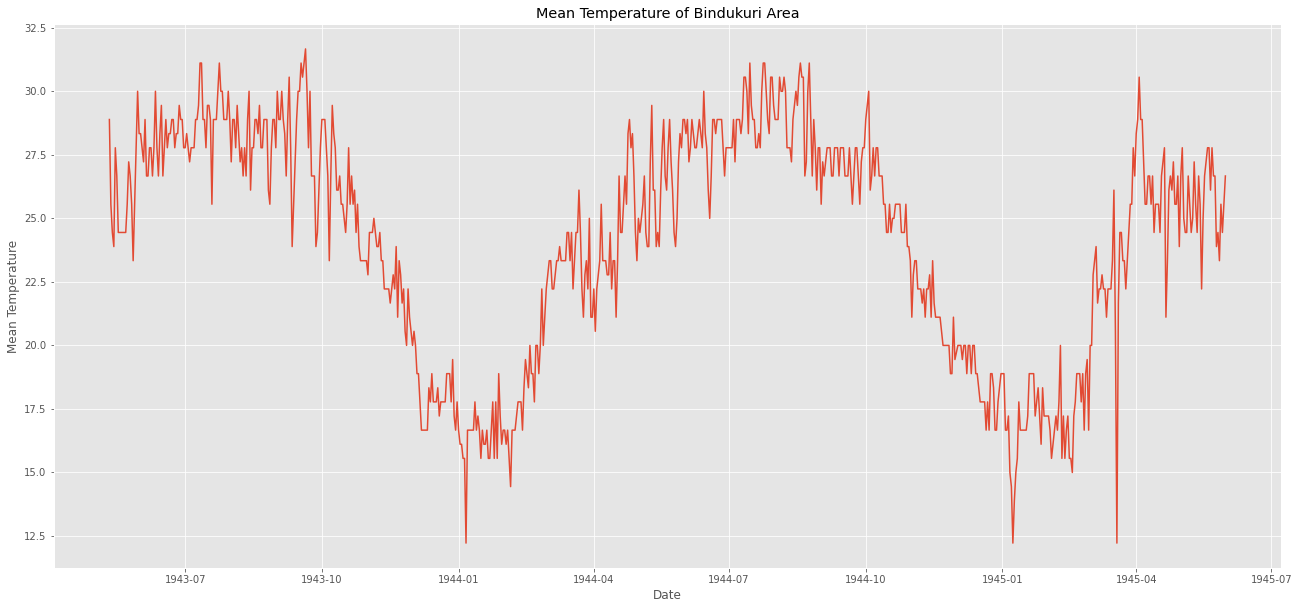

In [ ]:
weather_bin = weather[weather.STA == 32907]
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")

*  ossilates의 기운은 12도 ~ 32도사이이다.
* 당연히 여름달의 온도보다 겨울달이 더 춥다.

In [205]:
# 아래와 같이 각 행별로 계산하는 것보다 pandas 함수를 이용하자.
aerial = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WorldWar2/operations.csv")
aerial["year"] = [i.split("/")[2] for i in aerial["Mission Date"]]
aerial["month"] = [i.split("/")[0] for i in aerial["Mission Date"]]

# 아래와 같은 iterrow 방법은 loc, iloc 방법보다 3배 느리다.
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>"8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == "USA"]
aerial_war = aerial_war[aerial_war["Target Country"] == "BURMA"]
aerial_war = aerial_war[aerial_war["Target City"] == "KATHA"]


* 위 코드보다 효율대비 우수한 pandas를 활용해보자.

In [ ]:
aerial_temp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WorldWar2/operations.csv")
# for 구문을 pandas 문법활용
aerial_temp["year"] = aerial_temp["Mission Date"].str.split('/', n=2, expand=True).iloc[:,2]
aerial_temp["month"] = aerial_temp["Mission Date"].str.split('/', n=2, expand=True).iloc[:,0]

# loc pandas 문법활용
aerial_temp = aerial_temp.loc[aerial_temp["year"]>="1943"]
#aerial_temp = aerial_temp.loc[aerial_temp["month"]>"8"]

aerial_temp["Mission Date"] = pd.to_datetime(aerial_temp["Mission Date"])

aerial_war_temp = aerial_temp.loc[aerial_temp.Country == "USA"]
aerial_war_temp = aerial_war_temp.loc[aerial_war_temp["Target Country"] == "BURMA"]
aerial_war_temp = aerial_war_temp.loc[aerial_war_temp["Target City"] == "KATHA"]



In [ ]:
print( aerial.year.value_counts() ,'\n', aerial_temp.year.value_counts())
#print(aerial_war.count()==aerial_war_temp.count())

"Mission Date

1944    80550
1945    51408
1943    23214
Name: year, dtype: int64 
 1944    80550
1945    51408
1943    23214
Name: year, dtype: int64


In [248]:
# weather_bin 은 가장 가까운 기상관측소 번호로 필터된 날짜 와 기온데이터가 포함되어있음.
# 목적 : aerial_war와 Weather Date가 같은 날을 Mission Date에서 필터함과 동시에 
# Weather Date의 평균기온을 aerial_war 안에 넣는 것이 목표
# 여기서 작성자의 질문은 각 원소의 형태가 array로 되어 있는데, for문을 안쓰고 
# 일반 원소로 바꿀 수 있는지 여부였다.

liste = []
aa = []
## 기존 방법 ##
# aerial와 Weather Date가 같은 날의 평균 기온을 liste에 저장한다.
for i  in aerial_war["Mission Date"]:
  dummy = weather_bin[weather_bin.Date == i]
  liste.append(dummy['MeanTemp'].values)

# 평균 기온을  aerial_war 데이터내에 dene 변수에 삽입함.
aerial_war["dene"] = liste

# 이후 각 원소 별로 array된 값들을 list로 풀기위해 for문 작성
for i in aerial_war.dene.values:
  aa.append(i[0])
#-------------------------------------------------------------------------#
## 수정한 방법 ##
for i  in aerial_war["Mission Date"]:
  dummy = weather_bin[weather_bin.Date == i]
  liste.append(dummy['MeanTemp'].values)

# for 문을 사용하지 않고 array값을 list로 풀기
aa = aerial_war["dene"].astype('float64').to_list()


In [268]:
#Ctrate a trace
trace = go.Scatter(
    x=weather_bin.Date,
    mode= "lines",
    y=weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16,112,2,0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x= aerial_war["Mission Date"],
    mode = "markers",
    y= aa,
    marker =dict(color = 'rgba(16,0,200,1)'),
    name = "Mean Temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace, trace1]

fig = go.Figure(data=data, layout=layout)
fig.write_html("Create a trace")

* 녹색선은 Bindukuri에서 측정된 평균온도 이다.
* 파란색 점(마커)는 폭발날짜와 폭발 날짜 온도를 나타낸다.
* 그림에서 알 수 있듯이, 미국은 고온에서 폭탄을 터뜨린다.
* 본 EDA의 과정을 통한 질문은 ***미래의 날씨를 예측하고 이 예측을 통해 폭격의 실행 여부를 알 수 있는지 여부***이다.
* 이 질문에 답하기 위해 시계열을 시작해 보겠다.